# GridSearch CV

In [75]:
# imports
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [76]:
# load iris data
iris = load_iris()
X = iris.data
y = iris.target

In [77]:
# perform grid search
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
# n_jobs = -1 means use all available processors
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [78]:
# view the results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [79]:
# examine the individual tuples
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [80]:
# use a list comprehension
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
print(grid_mean_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97999999999999998, 0.97333333333333338, 0.97999999999999998, 0.96666666666666667, 0.96666666666666667, 0.97333333333333338, 0.95999999999999996, 0.96666666666666667, 0.95999999999999996, 0.96666666666666667, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


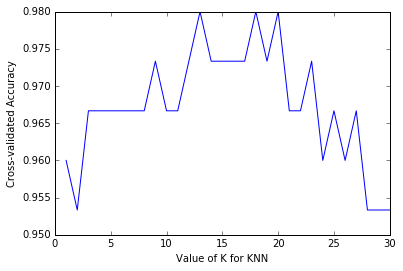

In [81]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated Accuracy')

In [82]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Searching multiple parameters simultaneously

In [83]:
# perform grid search
k_range = list(range(1,31))
# distance weighting gives greater weight to nearer neighbors
weight_options = list(['uniform','distance'])
param_grid = dict(n_neighbors=k_range,weights=weight_options)
knn = KNeighborsClassifier()
# n_jobs = -1 means use all available processors
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [84]:
# view the results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'weights': 'uniform', 'n_neighbors': 2},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, para

In [85]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'weights': 'uniform', 'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


### Using the best parameters to make predictions

In [86]:
# train model with all data and best parameters found above
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
knn.fit(X,y)
knn.predict([[3,5,4,2]])

array([1])

In [87]:
# GridSearchCV stores best model so you don't have to repeat fitting as above
grid.predict([[3,5,4,2]])

array([1])

In [93]:
# randomized search; to avoid computational expense of an exhaustive grid search;
# note that the optimal set or parameters may NOT be found (depends on random_state)
param_dict = dict(n_neighbors=k_range,weights=weight_options)
rand = RandomizedSearchCV(knn, param_dict, cv=10, scoring='accuracy',
                          n_iter=30,random_state=3)
rand.fit(X,y)
rand.grid_scores_

[mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 13},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 29},
 mean: 0.96000, std: 0.05333, params: {'weights': 'distance', 'n_neighbors': 2},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 5},
 mean: 0.96000, std: 0.05333, params: {'weights': 'uniform', 'n_neighbors': 1},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 21},
 mean: 0.97333, std: 0.032